# COMP551 -001 Kaggle Competition: Linear Classifier and Neural Net

In [162]:
import numpy   as np   
from scipy import ndimage
import scipy.misc # to visualize only
from scipy.misc import imresize
from skimage.restoration import denoise_bilateral
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [2]:
X_train = np.loadtxt("Datasets/train_x.csv", delimiter=",") # load from text 
print("Loaded Train Set")
Y_train = np.loadtxt("Datasets/train_y.csv", delimiter=",") 
X_test = np.loadtxt("Datasets/test_x.csv", delimiter=",")
print("Loaded Test Set")
X_train = X_train.reshape(-1, 64, 64) # reshape 
Y_train = Y_train.reshape(-1, 1) 
X_test = X_test.reshape(-1, 64, 64) # reshape

Loaded Train Set
Loaded Test Set


In [ ]:
X_train[60][:,50]

In [212]:
####################### PREPROCESSING IMAGE ARRAYS #####################################
X_train_processed = np.where(X_train>250, 1, 0)
X_test_processed = np.where(X_test>250, 1, 0)

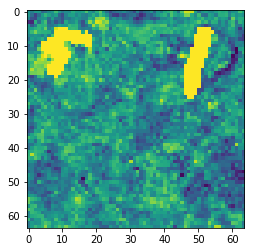

[ 1.]


In [216]:
########################### VISUALIZING DATA ON DEFAULT TRAINING SET ###############################################
num = 60
plt.imshow(ndimage.median_filter(X_train[num],1)) # to visualize only
plt.show()
print(Y_train[num])

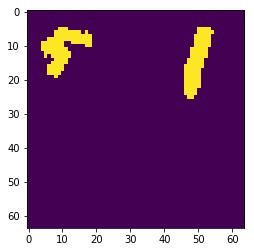

[ 1.]


In [215]:
########################### VISUALIZING DATA ON BINARIZED TRAINING SET ###############################################
num = 60
plt.imshow(X_train_processed[num]) # to visualize only
plt.show()
print(Y_train[num])

In [238]:
############################ EXTRACTING THE LARGEST DIGIT AND CREATING A NEW TRAINING SET ####################################
X_train_extracted = []

for image in X_train_processed:
    im = ndimage.median_filter(image, 1)

    mask = im > im.mean()

    label_im, nb_labels = ndimage.label(mask)

    # Find the connected components
    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
    mask_size = sizes < 70
    remove_pixel = mask_size[label_im]
    label_im[remove_pixel] = 0
    labels = np.unique(label_im)
    label_im = np.searchsorted(labels, label_im)

    # Slice out the largest digit
    best_slice_x, best_slice_y = 0,0
    max_area = 0
    for i in range(len(labels)-1):
        slice_x, slice_y = ndimage.find_objects(label_im==i+1)[0]
        area = (slice_x.stop - slice_x.start)*(slice_y.stop - slice_y.start)
        if(np.array_equal(image, X_train_processed[60])):
            print("Area")
            print(area)
            print("Max Area")
            print(max_area)
        if(area > max_area):
            max_area = area
            best_slice_x = slice_x
            best_slice_y = slice_y

    largest_digit = im[best_slice_x, best_slice_y]
    X_train_extracted.append(largest_digit)


Area
225
Max Area
0
Area
189
Max Area
225


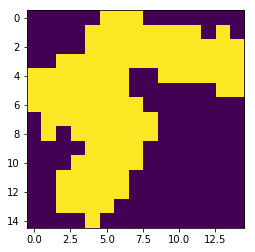

[ 1.]


In [246]:
########################### VISUALIZING DATA ON EXTRACTED TRAINING SET ###############################################
num = 60
plt.imshow(ndimage.median_filter(X_train_extracted[num],1)) # to visualize only
plt.show()
print(Y_train[num])

In [247]:
########################### RESIZING AND BINARIZING IMAGES IN NEW TRAINING SET ##################################################
resized_arr = []
for image in X_train_extracted:
    resized_image = imresize(image, (30,30))
    resized_arr.append(resized_image)

#Binarize the images
resized_arr_bin = np.where(np.array(resized_arr)>125, 1, 0)

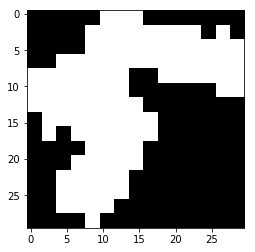

[ 1.]


In [249]:
########################### VISUALIZING DATA ON RESIZED TRAINING SET ###############################################
num = 60
plt.imshow(resized_arr_bin[num], cmap = "gray") # to visualize only
plt.show()
print(Y_train[num])

In [ ]:
########################## SUPPORT VECTOR MACHINE CLASSIFIER ################################
svm_clf = SVC()
#Train the classifier
svm_fit = svm_clf.fit(X_train, Y_train)
#Predict labels
svm_predict = svm_fit.predict(X_test)
np.savetxt('svm_labels.csv', svm_predict, delimiter=',')

In [ ]:
########################## LOGISTIC REGRESSION CLASSIFIER ###################################
lg_clf = LogisticRegression()
#Train the classifier
lg_fit = lg_clf.fit(X_train, Y_train)
#Predict labels
lg_predict = lg_fit.predict(X_test)

In [ ]:
########################## FEED FORWARD NEURAL NETWORK ########################################
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2